### Imperative vs. Declarative

**PyTorch** leans towards an imperative programming style, allowing step-by-step execution where operations are performed as they're defined. This aligns with an imperative approach where statements directly change the state.

**TensorFlow** (especially pre-TensorFlow 2.x) was more declarative with its static computation graph. Users would define the computation graph first and then execute it within a session. However, TensorFlow 2.x with eager execution adopted a more imperative approach, similar to PyTorch.

This PyTorch code directly performs operations on tensors x and y, showcasing an imperative approach where operations are executed immediately.

In [ ]:
import torch

# Defining tensors imperatively
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

# Performing operations imperatively
result = x + y
print(result)

TensorFlow 2.x with eager execution enables immediate execution of operations on tensors, similar to PyTorch's imperative nature.

In [ ]:
import tensorflow as tf

# Defining tensors using TensorFlow
x = tf.constant([[1, 2], [3, 4]])
y = tf.constant([[5, 6], [7, 8]])

# Performing operations using TensorFlow
result = tf.add(x, y)
print(result)

### Dynamic vs. Static Typing
**PyTorch** embodies dynamic typing, allowing changes in tensor shapes and sizes during runtime, akin to dynamically typed languages like Python. Its dynamic computational graph facilitates this flexibility.
**TensorFlow** historically represented static typing due to its static computation graph. However, TensorFlow 2.x with eager execution now exhibits more dynamic characteristics, allowing dynamic changes to the graph during runtime, akin to dynamically typed languages.

Here, PyTorch creates tensors with varying sizes during runtime, showcasing its dynamic typing nature.

In [ ]:
import torch

# Creating tensors with dynamic shapes
sizes = [2, 3]
for size in sizes:
    tensor = torch.randn(size)
    print(tensor)

TensorFlow 2.x with eager execution allows creating tensors with dynamic shapes similar to PyTorch.

In [ ]:
import tensorflow as tf

# Creating tensors with varying shapes
sizes = [2, 3]
for size in sizes:
    tensor = tf.random.normal((size,))
    print(tensor)

### Functional vs. Object-Oriented
**PyTorch** often aligns more with a functional programming paradigm, emphasizing the creation and manipulation of tensors using functional-style operations and allowing functional programming constructs within the network.
**TensorFlow** with its Keras API emphasizes an object-oriented approach, offering a more structured way of defining models through layers and models as objects.

PyTorch allows functional-style operations directly on tensors, exemplified here by squaring each element in a tensor.

In [ ]:
import torch

# Functional-style operations
tensor = torch.tensor([1, 2, 3, 4])
squared = torch.square(tensor)
print(squared)

TensorFlow, especially through the Keras API, employs an object-oriented approach where layers and models are defined as objects, enabling a structured way to build models.

In [ ]:
import tensorflow as tf

# Using Keras layers for object-oriented approach
layer = tf.keras.layers.Dense(10, activation='relu')
x = tf.random.normal((3, 4))
output = layer(x)
print(output)

### What is Eager vs. Lazy Evaluation?

**Eager** execution uses imperative programming which is basically the same concept as dynamic computation graphs. Code is executed and run on the go just like how Python works usually.
**Lazy** execution uses symbolic programming which is same as static computation graphs. Functions are defined abstractly and no actual computation takes place until the function is explicitly compiled and run. That is, the values are not created at the time of defining the functions. In order to materialize the variables, the static computation graph is first created, compiled and then run.
In Tensorflow2.0, you can easily switch between eager execution which are better for development, and lazy mode which are better for deployment.

For a better understanding let’s look at a code snippet below.

In [4]:
# In tf2.0, eager execution is default
import tensorflow as tf
tf.executing_eagerly()

True

By default, you can see that Tensorflow2.0 uses eager execution. Let’s perform a mathematical operation to check how computation graph is executed as variables and operations are defined.

In [5]:
# Define objects
a = tf.constant(5, name = "a")
b = tf.constant(7, name = "b")
c = tf.add(a, b, name = "sum")

c

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In eager execution, the variable c‘s value can be seen right after declaring variables a, b, and function tf.add.

Let’s see the same thing in lazy execution model. It requires the declaration of tf.Session for the same operation.

For doing this in Tensorflow2.0, we enable the features of Tensorflow1.x by using tf.v1.compat library. All the coding paradigms related to earlier version (Tensorflow 1.x) are bundled up in tf.compat module.

In [6]:
# Disable eager execution
tf.compat.v1.disable_v2_behavior()

# or do: tf.compat.v1.disable_eager_execution()

tf.compat.v1.executing_eagerly()

Instructions for updating:
non-resource variables are not supported in the long term


False

After running disable_v2_behavior you can see that eager execution is no more enabled by default.

Let’s perform another mathematical operation to check if we can still run the computation graph without initialising sessions.

In [7]:
# Define objects again
x = tf.constant(10, name = "x")
y = tf.constant(3, name = "y")
z = tf.add(x, y, name = "sum")

z

<tf.Tensor 'sum:0' shape=() dtype=int32>

z has a value of 0, because in lazy execution, or a static graph, the computation doesn’t take place without first defining all operations and then running it.

Let’s do the same thing as above using a session.

In [8]:
# Init Session and run
sess = tf.compat.v1.Session()
sess.run(z)

2023-11-20 10:56:14.476119: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


13

Now you can see that the correct value of z is visible.

Therefore TF2.0 supports both eager and lazy execution as seen above.

### Comparison between TensorFlow1.x, TensorFlow2.0 and PyTorch

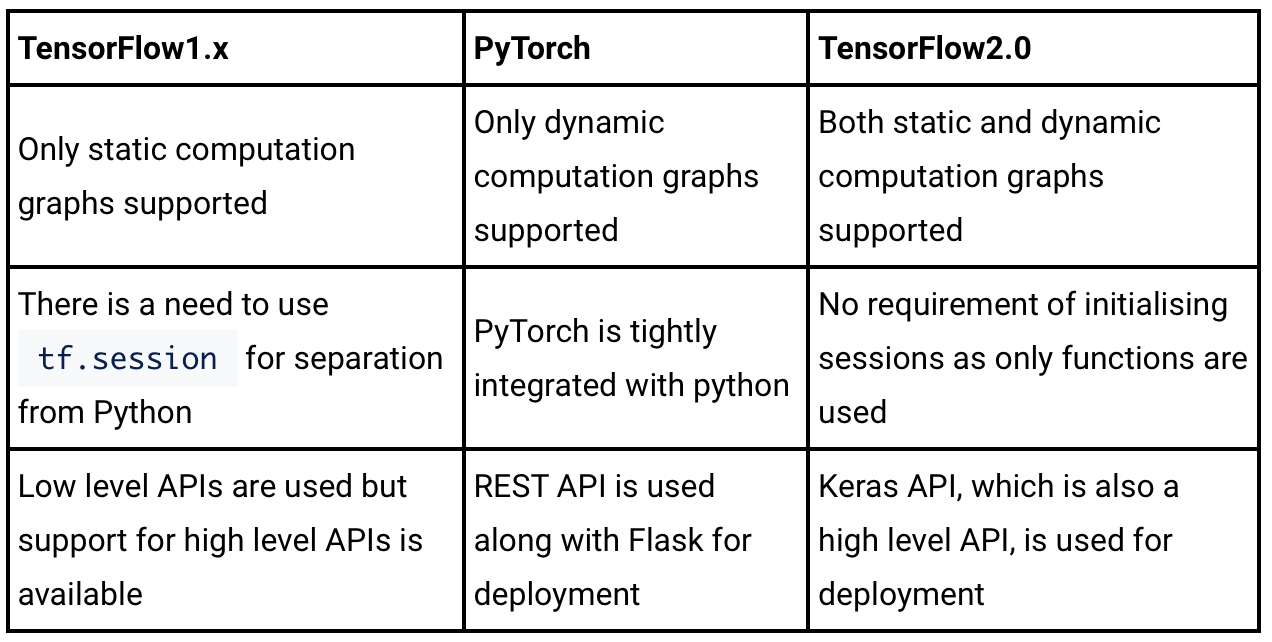

### Difference between Static Computational Graphs in TensorFlow and Dynamic Computational Graphs in Pytorch

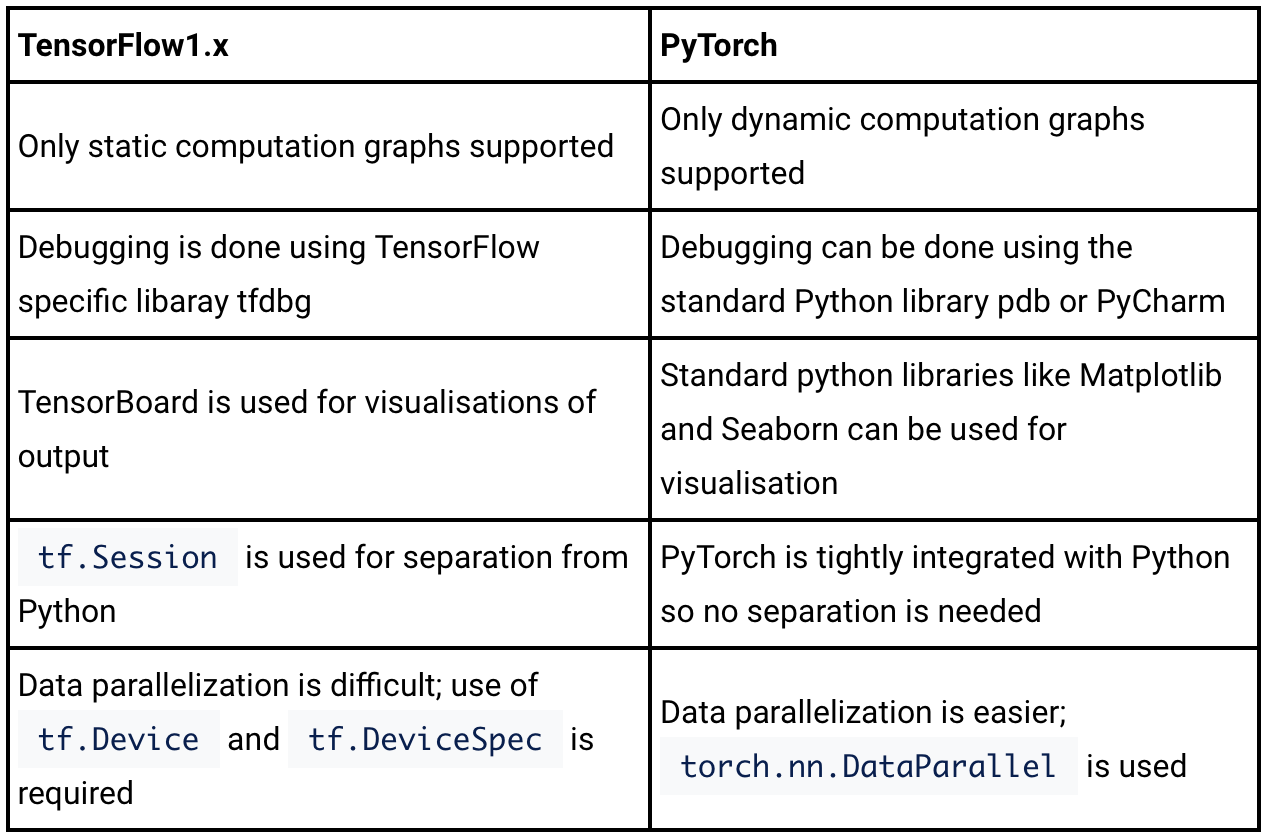